## การทำ Text classification





ติดตั้ง Libraries สำหรับจัดการข้อมูลประเภทข้อความภาษาอังกฤษ

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import  word_tokenize
from nltk.corpus import stopwords
import spacy
import string
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ทำการเชื่อม Google Drive

In [10]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


ระบุ Folder ใน Drive ที่ต้องการใช้

In [11]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

อ่านข้อมูลจากไฟล์

In [19]:
import pandas as pd

data = pd.read_csv("...................",encoding='latin-1')
print(.....)

                                               Content      Topic
0    Thermochemistry was challenging, but I enjoyed...  Chemistry
1    Learning about gravitational forces was intere...    Physics
2    Wave-particle duality was a bit confusing, but...    Physics
3    Learning about gravitational forces was intere...    Physics
4    The lecture on nuclear physics was fascinating...    Physics
..                                                 ...        ...
295  I loved learning about Newton's laws, especial...    Physics
296  Chemical bonding was hard, but once I got the ...  Chemistry
297  Stoichiometry was tough at first, but with pra...  Chemistry
298  The explanation of quantum mechanics was reall...    Physics
299  Electromagnetism was hard at first, but the vi...    Physics

[300 rows x 2 columns]


# Data Preprocessing  สร้างเป็นฟังก์ชันเพื่อเรียกใช้ซ้ำ

In [20]:
def data_preprocessing(cleaned_data):
    # กำจัด URL
    cleaned_data = " ".join(re.sub(r"https?://[A-Za-z0-9./]+", '', w ) for w in cleaned_data.split())

    # แปลงข้อมูลเป็นตัวพิมพ์เล็ก ... lower case
    cleaned_data = " ".join(w.lower() for w in cleaned_data.split())

    # Lemmatization ด้วย Spacy
    nlp = spacy.load("en_core_web_sm")
    cleaned_data =  " ".join([w.lemma_ for w in nlp(cleaned_data) if w.lemma_ != "-PRON-"])

    # กำจัด stop words
    stop = stopwords.words('english')
    cleaned_data = " ".join(w for w in word_tokenize(cleaned_data) if w not in stop)

    # ตัดเครื่องหมายวรรคตอน ... remove punctuation
    cleaned_data =  " ".join([w for w in cleaned_data.split() if w not in list(string.punctuation)])

    # กำจัดตัวเลข
    cleaned_data = " ".join(re.sub(r"[0-9.]+%", '', w ) for w in cleaned_data.split())

    # กำจัดข้อความหลัง ' เครื่องหมาย aposophi
    cleaned_data = " ".join(re.sub(r"(')[A-Za-z]+", '', w ) for w in cleaned_data.split())

    return cleaned_data

เรียกใช้งานฟังก์ชัน data_preprocessing

In [21]:
.................... = data['Content'].apply(data_preprocessing)
# แสดงผลข้อมูลหลังจาก Data Preprocessing
print(data)

                                               Content      Topic
0    thermochemistry challenge I enjoy energy conce...  Chemistry
1    learn gravitational force interesting especial...    Physics
2    wave particle duality bit confusing start make...    Physics
3    learn gravitational force interesting especial...    Physics
4    lecture nuclear physics fascinating I wish tim...    Physics
..                                                 ...        ...
295  I love learn newton  law especially apply ever...    Physics
296        chemical bonding hard I get hang make sense  Chemistry
297  stoichiometry tough first practice become much...  Chemistry
298  explanation quantum mechanic really challenge ...    Physics
299    electromagnetism hard first visual aid help lot    Physics

[300 rows x 2 columns]


# สร้าง TF-IDF vectors

In [23]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(data['.....'])

tfidf_vect = TfidfVectorizer(max_features=5000)
tfidf_vect.fit(data['......'])
x_tfidf = tfidf_vect.transform(data['......'])
print(x_tfidf[0:5] )


  (0, 137)	0.45149947112581157
  (0, 49)	0.30167565897793336
  (0, 47)	0.45149947112581157
  (0, 32)	0.45149947112581157
  (0, 30)	0.39640161591299483
  (0, 21)	0.3745694039842729
  (1, 129)	0.40596157812398387
  (1, 122)	0.40596157812398387
  (1, 85)	0.23006669018098255
  (1, 81)	0.3281878546529126
  (1, 71)	0.40596157812398387
  (1, 66)	0.40596157812398387
  (1, 56)	0.3344430668508549
  (1, 53)	0.2613248428894952
  (2, 150)	0.3503599310144611
  (2, 130)	0.3503599310144611
  (2, 125)	0.3048070180760691
  (2, 106)	0.3503599310144611
  (2, 92)	0.2221009646526352
  (2, 39)	0.3503599310144611
  (2, 36)	0.2942767314912226
  (2, 31)	0.3503599310144611
  (2, 25)	0.2942767314912226
  (2, 15)	0.26609368187790555
  (3, 129)	0.40596157812398387
  (3, 122)	0.40596157812398387
  (3, 85)	0.23006669018098255
  (3, 81)	0.3281878546529126
  (3, 71)	0.40596157812398387
  (3, 66)	0.40596157812398387
  (3, 56)	0.3344430668508549
  (3, 53)	0.2613248428894952
  (4, 151)	0.40104249665289354
  (4, 141)	0.401

สร้าง Training และ Testing set

In [24]:
# Split the data into train and validation
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_tfidf, y)


NB: 0.960000 
Log-reg: 1.000000 
SVC: 1.000000 
RandomForest: 1.000000 


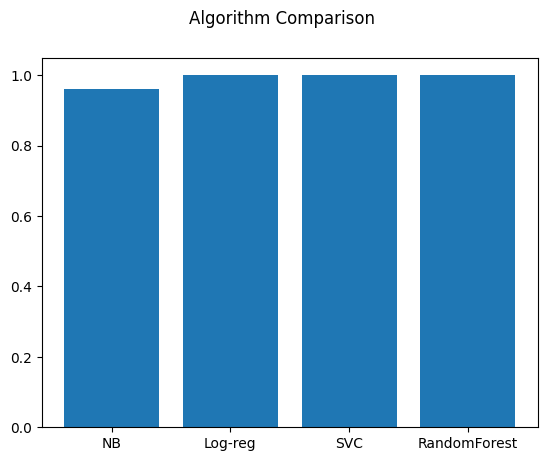

In [25]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Model building and evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
models = []
models.append(('NB', MultinomialNB()))
models.append(('Log-reg', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('RandomForest', RandomForestClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, clf in models:
  model = clf
  model.fit(X_train,y_train)
  Predited_class = model.predict(X_test)
  accuracy=accuracy_score(y_test, Predited_class)
  results.append(accuracy)
  names.append(name)
  msg = "%s: %f " % (name, accuracy)
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names,results)

plt.show()

# Apply the best model

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)

Appication form for data classifcaion

In [ ]:
#@title Enter Content
Content = "I  do not like it" #@param {type:"string"}
# use the classifier to predict the sentiment of given text
Content = data_preprocessing(Content)
xtest_tfidf = tfidf_vect.transform([Content])
result = model.predict(xtest_tfidf)

result = encoder.inverse_transform(result)
if ...................
      print("....................")
elif ..................... :
      print("....................")

